In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import io
%cd '/Users/rajeshprabhakarkaila/Desktop/Datasets/Invehicle recommendation'

/Users/rajeshprabhakarkaila/Desktop/Datasets/Invehicle recommendation


In [29]:
couponrecommend=pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [30]:
couponrecommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [31]:
couponrecommend=couponrecommend.drop('car',axis=1)

In [32]:
couponrecommend.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [33]:
nacols=['Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20', 
        'Restaurant20To50']

In [34]:
for col in nacols:
    couponrecommend[col]=couponrecommend[col].fillna(
    couponrecommend[col].value_counts().idxmax())

In [35]:
conda update --all

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [36]:
from pandas_profiling import ProfileReport

In [37]:
profile = ProfileReport(couponrecommend, title="Pandas Profiling Report")

In [38]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scip

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
pd.crosstab(couponrecommend.Y,couponrecommend.gender)

gender,Female,Male
Y,,
0,2948,2526
1,3563,3647


In [40]:
from scipy.stats import chi2_contingency

In [41]:
# Test Null No Association between Y and gender
chi2_contingency(pd.crosstab(couponrecommend.Y,couponrecommend.gender))
# Since p-value=8.05552865589407e-07 is less than 0.05, Reject Null
# Null - No Association between both variables

(24.344527038622925,
 8.05552865589407e-07,
 1,
 array([[2809.93487859, 2664.06512141],
        [3701.06512141, 3508.93487859]]))

In [42]:
pd.crosstab(couponrecommend.Y,couponrecommend.maritalStatus)

maritalStatus,Divorced,Married partner,Single,Unmarried partner,Widowed
Y,,,,,
0,243,2331,1873,959,68
1,273,2769,2879,1227,62


In [43]:
# Test Null No Association between Y and maritalStatus
chi2_contingency(pd.crosstab(couponrecommend.Y,
                             couponrecommend.maritalStatus))
# Since p-value =6.48964798323251e-10,is less than 0.05, Reject Null
# Null - No Association between both variables

(48.77999591154126,
 6.48964798323251e-10,
 4,
 array([[ 222.68874172, 2200.99337748, 2050.80794702,  943.40618102,
           56.10375276],
        [ 293.31125828, 2899.00662252, 2701.19205298, 1242.59381898,
           73.89624724]]))

In [44]:
# Test Null No Association between Y and toCoupon_GEQ15min
pd.crosstab(couponrecommend.Y,couponrecommend.toCoupon_GEQ15min)

toCoupon_GEQ15min,0,1
Y,,
0,2146,3328
1,3416,3794


In [45]:
chi2_contingency(pd.crosstab(couponrecommend.Y,
                             couponrecommend.toCoupon_GEQ15min))
# Since p-value=4.6359722947672643e-20,is less than 0.05, Reject Null
# Null - No Association between both variables

(84.12867672199123,
 4.6359722947672643e-20,
 1,
 array([[2400.37748344, 3073.62251656],
        [3161.62251656, 4048.37748344]]))

In [46]:
couponrecommend=couponrecommend.drop(['toCoupon_GEQ5min',
                                      'direction_same'],axis=1)

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()

In [50]:
objectcols_encode=couponrecommend.drop(['temperature','Y'],
                                       axis=1).apply(le.fit_transform)

In [59]:
couponrecommenddf=pd.concat([couponrecommend.temperature,objectcols_encode],
                           axis=1)

In [60]:
y=couponrecommend.Y
X=couponrecommenddf

In [61]:
from sklearn.linear_model import LogisticRegression

In [64]:
logit=LogisticRegression(max_iter=1000)

In [65]:
logitmodel=logit.fit(X,y)

In [66]:
logitmodel.score(X,y)

0.629454430778934

In [67]:
logitpredict=logitmodel.predict(X)

In [68]:
pd.crosstab(y,logitpredict)

col_0,0,1
Y,,
0,2439,3035
1,1665,5545


In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.59      0.45      0.51      5474
           1       0.65      0.77      0.70      7210

    accuracy                           0.63     12684
   macro avg       0.62      0.61      0.61     12684
weighted avg       0.62      0.63      0.62     12684



In [71]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
tree=DecisionTreeClassifier(max_depth=10)

In [91]:
treemodel=tree.fit(X,y)

In [92]:
treemodel.score(X,y)

0.7945443077893409

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
cross_val_score(tree,X,y)

array([0.65628695, 0.68624359, 0.63066614, 0.62869531, 0.61553628])

In [95]:
treepredict=treemodel.predict(X)

In [96]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      5474
           1       0.80      0.85      0.83      7210

    accuracy                           0.79     12684
   macro avg       0.79      0.79      0.79     12684
weighted avg       0.79      0.79      0.79     12684



In [97]:
from sklearn.metrics import RocCurveDisplay

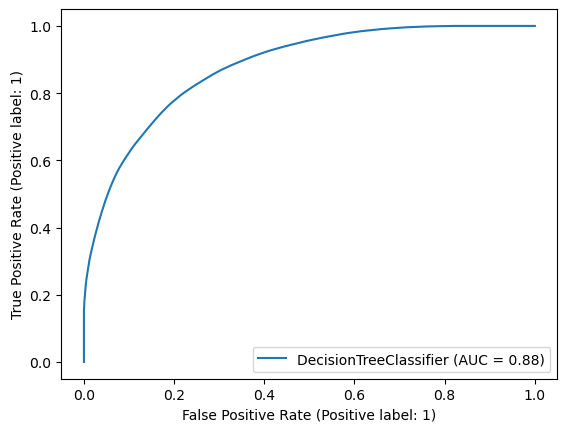

In [98]:
RocCurveDisplay.from_estimator(tree,X,y)

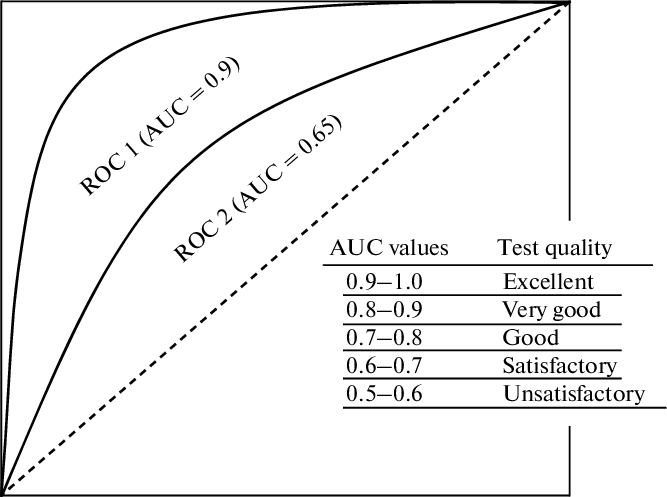

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
RF=RandomForestClassifier(n_estimators=3000,max_depth=10)

In [101]:
RFmodel=RF.fit(X,y)

In [102]:
RFmodel.score(X,y)

0.8354619993692841

In [103]:
cross_val_score(RF,X,y)

array([0.68703193, 0.69609775, 0.67836027, 0.67087111, 0.70031546])

In [104]:
RFpredict=RFmodel.predict(X)

In [105]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      5474
           1       0.81      0.93      0.87      7210

    accuracy                           0.84     12684
   macro avg       0.85      0.82      0.83     12684
weighted avg       0.84      0.84      0.83     12684



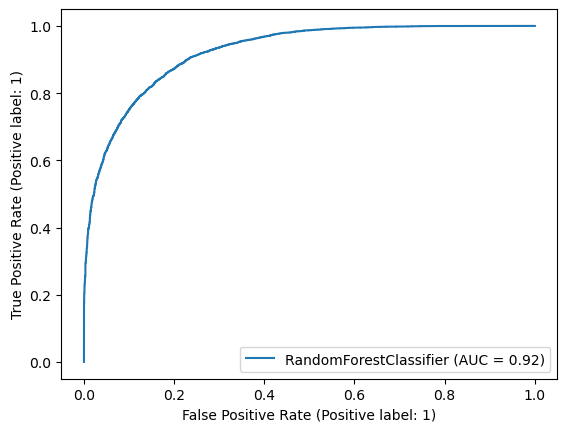

In [106]:
RocCurveDisplay.from_estimator(RF,X,y)

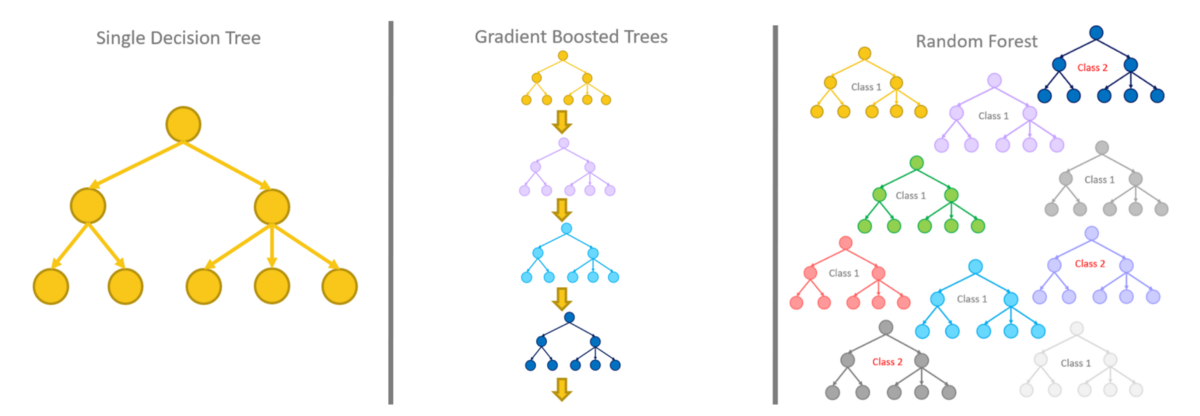

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
gbm=GradientBoostingClassifier(n_estimators=5000)

In [121]:
gbmmodel=gbm.fit(X,y)

In [122]:
gbmmodel.score(X,y)

0.8669189530116682

In [116]:
cross_val_score(gbm,X,y)

array([0.67836027, 0.65116279, 0.62357115, 0.63342531, 0.65772871])

In [123]:
gbmpredict=gbmmodel.predict(X)

In [124]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      5474
           1       0.86      0.91      0.89      7210

    accuracy                           0.87     12684
   macro avg       0.87      0.86      0.86     12684
weighted avg       0.87      0.87      0.87     12684



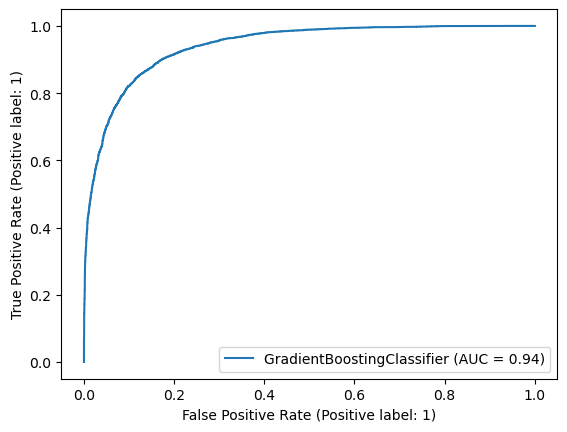

In [125]:
RocCurveDisplay.from_estimator(gbm,X,y)